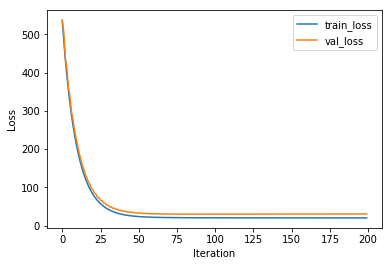

In [15]:
from sklearn import datasets as ds
from sklearn.cross_validation import train_test_split
import numpy as np
import matplotlib.pyplot as plt


feature_size = 13
x, y = ds.load_svmlight_file("./Housing")
train_x, val_x, train_y, val_y = train_test_split(x, y, test_size=0.2)

train_x = train_x.toarray().astype(np.float32)
temp = np.ones(shape=[len(train_y), 1], dtype=np.float32)
train_x = np.concatenate([train_x, temp], axis=1)
val_x = val_x.toarray().astype(np.float32)
temp = np.ones(shape=[len(val_y), 1], dtype=np.float32)
val_x = np.concatenate([val_x, temp], axis=1)
train_y = train_y.astype(np.float32).reshape([len(train_y), 1])
val_y = val_y.astype(np.float32).reshape([len(val_y), 1])


w = np.random.random(size=(feature_size + 1, 1))

lr = 0.001
ite = []
train_loss_set = []
val_loss_set = []
for i in range(0, 200):
    ite.append(i)
    gradient = -np.matmul(train_x.transpose(), train_y - np.matmul(train_x, w))
    w -= lr * gradient

    train_loss = np.mean((train_y - np.matmul(train_x, w)) ** 2)
    train_loss_set.append(train_loss)
    val_loss = np.mean((val_y - np.matmul(val_x, w)) ** 2)
    val_loss_set.append(val_loss)

plt.plot(ite, train_loss_set, label='train_loss')
plt.plot(ite, val_loss_set, label='val_loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()
